In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv('./data/data_titanic.csv') 

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df1=df.drop(columns=['Cabin','Ticket','PassengerId'])

In [8]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [9]:
df1['Age'].fillna(round(df1["Age"].mean(),1),inplace=True)
df1['Embarked'].fillna('S',inplace=True)

In [10]:
df1.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

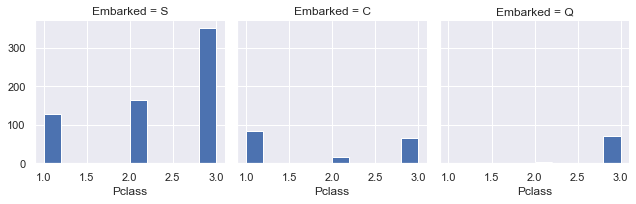

In [11]:
y=sns.FacetGrid(df1,col='Embarked')
y.map(plt.hist,'Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

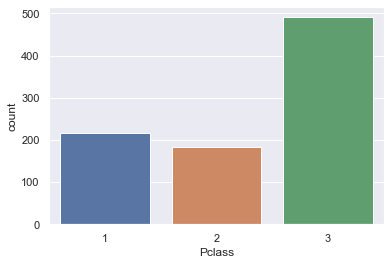

In [12]:
sns.countplot(x='Pclass',data=df1)

In [13]:
df1["Title"] = df1["Name"].str.split(',').str[1].str.split(".").str[0]
df1=df1.drop(columns=['Name'])

In [14]:
Title_Dictionary = {

                    " Capt":       "Officer",

                    " Col":        "Officer",

                    " Major":      "Officer",

                      " Dr":         "Officer",

                    " Rev":        "Officer" ,

                    " Jonkheer":   "Royalty",

                    " Don":        "Royalty",

                    " Sir" :       "Royalty",

                   " Lady" :      "Royalty" ,

                  " the Countess": "Royalty",

                    " Dona":       "Royalty",

                    " Mme":        "Miss",

                    " Mlle":       "Miss",

                    " Miss" :      "Miss",

                    " Ms":         "Mrs",

                    " Mr" :        "Mrs",

                    " Mrs" :       "Mrs" ,

                    " Master" :    "Master"

                    }

In [15]:
df1['Title'].replace(Title_Dictionary,inplace=True)

In [16]:
df1['Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [17]:
label_encoder=LabelEncoder()
df1['Embarked']=label_encoder.fit_transform(df1['Embarked'])

In [18]:
label_encoder=LabelEncoder()
df1['Sex']=label_encoder.fit_transform(df1['Sex'])


In [19]:
label_encoder=LabelEncoder()
df1['Title']=label_encoder.fit_transform(df1['Title'])


In [20]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )



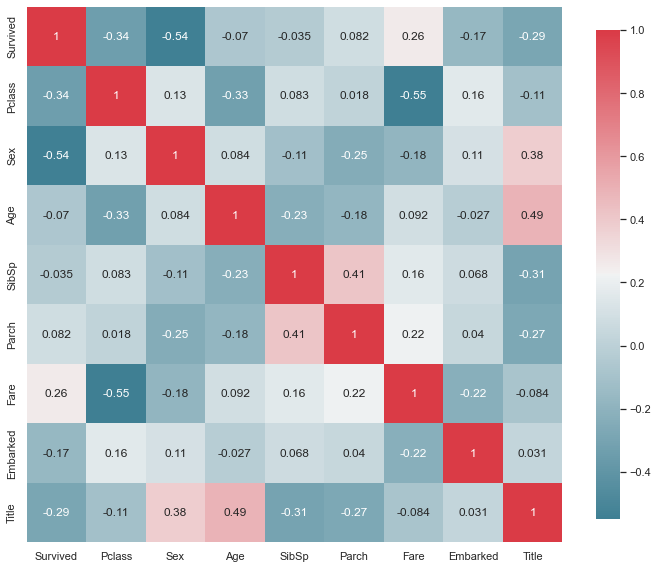

In [21]:
plot_correlation_map(df1)

In [22]:
X=df1.drop(columns=['Survived'])
Y=df1['Survived']

#splitting data
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20,random_state=10)

#applying tree algorithm
clf = tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8212290502793296


In [23]:
train_accuracy=[]
test_accuracy=[]
for k in range(1,9):
    
    clf = tree.DecisionTreeClassifier(max_depth=k)

    clf.fit(x_train, y_train)

    train_accuracy.append(clf.score(x_train, y_train))

    test_accuracy.append(clf.score(x_test, y_test))

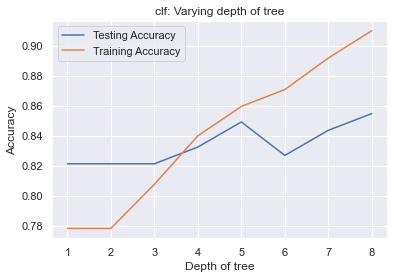

In [24]:
plt.title('clf: Varying depth of tree')
plt.plot(range(1,9), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(1,9), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

In [25]:
clf = tree.DecisionTreeClassifier(max_depth=5)  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8491620111731844


In [26]:
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=65)  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8212290502793296


In [27]:
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=30)  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8268156424581006


In [28]:
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=30, max_leaf_nodes=20)  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8268156424581006


In [29]:
train_accuracy=[]
test_accuracy=[]
for k in range(2,30):
    
    clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=k)

    clf.fit(x_train, y_train)

    train_accuracy.append(clf.score(x_train, y_train))

    test_accuracy.append(clf.score(x_test, y_test))

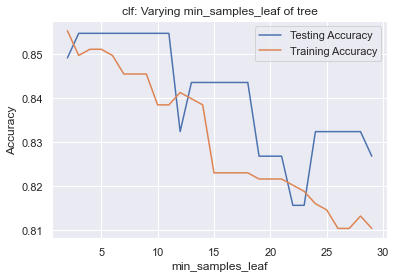

In [30]:
plt.title('clf: Varying min_samples_leaf of tree')
plt.plot(range(2,30), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(2,30), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.show()

In [31]:
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8547486033519553


In [35]:
clf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8547486033519553


In [32]:
train_accuracy=[]
test_accuracy=[]
for k in range(2,30):
    
    clf = tree.DecisionTreeClassifier(min_samples_leaf=k)

    clf.fit(x_train, y_train)

    train_accuracy.append(clf.score(x_train, y_train))

    test_accuracy.append(clf.score(x_test, y_test))

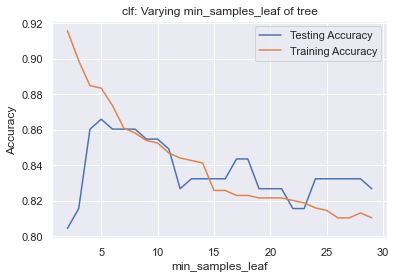

In [33]:
plt.title('clf: Varying min_samples_leaf of tree')
plt.plot(range(2,30), test_accuracy, label = 'Testing Accuracy')
plt.plot(range(2,30), train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.show()

In [34]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=5)

clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8659217877094972


In [57]:
clf=RandomForestClassifier()  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8212290502793296


In [64]:
clf=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8324022346368715


In [65]:
clf=RandomForestClassifier(n_estimators=200)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8324022346368715


In [66]:
clf=RandomForestClassifier(n_estimators=300)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8268156424581006
